In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Pandas – Loading and Cleaning Data
Today, we'll learn to use **Pandas**, the most essential tool in a Python data scientist's toolkit, to take a raw,
messy dataset and turn it into a clean, reliable foundation for analysis.


1.  The Building Blocks:** What are Pandas `Series` and `DataFrames`?
2.  Getting the Data:** Reading CSV files and first-look inspection.
3.  The Cleaning Workflow:**
    *   Handling Missing Values (`NaN`)
    *   Finding and Removing Duplicates
    *   Correcting Data Types and Formatting
4.  Exporting Our Clean Data.**

The two core data structures in Pandas.

*   **`Series`**: A one-dimensional labeled array, like a single column in a spreadsheet.
*   **`DataFrame`**: A two-dimensional labeled data structure with columns of potentially different types, like a full spreadsheet or an SQL table.

Let's quickly create them to see how they work. First, we need to import pandas. The standard convention is to import it as `pd`.

In [1]:
import pandas as pd
import numpy as np



## Create a Series Object from a List
- A pandas **Series** is a one-dimensional labelled array.
- A Series combines the best features of a list and a dictionary.
- A Series maintains a single collection of ordered values (i.e. a single column of data).
- We can assign each value an identifier, which does not have to *be* unique.

In [3]:
list1=[1,2,3,4,5,6,7,8,9]
pd.Series(list1)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [9]:
dict1={
    "Name":"Angel mainali",
    "Age":"20"
    
}
pd.Series(dict1)


Name    Angel mainali
Age                20
dtype: object

In [16]:
ice_cream = ["Chocolate","" ,"","Vanilla", "Strawberry", "Rum Raisin"]
pd.Series(ice_cream)

0     Chocolate
1              
2              
3       Vanilla
4    Strawberry
5    Rum Raisin
dtype: object

In [17]:
lottery_numbers = [4, 8, 15, 16, 23, 42]
pd.Series(lottery_numbers,index=[ice_cream])


Chocolate      4
               8
              15
Vanilla       16
Strawberry    23
Rum Raisin    42
dtype: int64

In [20]:
s = pd.Series(lottery_numbers, index=["A", "B", "C", "D", "E", "F"])
print(s)


A     4
B     8
C    15
D    16
E    23
F    42
dtype: int64


In [21]:
sushi = {
    "Salmon": "Orange",
    "Tuna": "Red",
    "Eel": "Brown"
}

pd.Series(sushi)

Salmon    Orange
Tuna         Red
Eel        Brown
dtype: object

In [22]:
# Creating a Series from a list
student_grades = pd.Series([85, 92, 78, 65, 95], index=['Alice','Bob','Charlie', 'Henry', 'Smith'])
print(student_grades)

Alice      85
Bob        92
Charlie    78
Henry      65
Smith      95
dtype: int64


In [23]:
# A Series can have a custom index
student_names = pd.Series(
    [85, 92, 78],
    index=['Alice', 'Bob', 'Charlie']
)
print("A Series :")
print(student_names)

A Series :
Alice      85
Bob        92
Charlie    78
dtype: int64


### Creating a `DataFrame`

A `DataFrame` is the most common object you'll work with. It's a collection of Series. The most common way to create one from scratch is using a dictionary.

In [24]:
data={
'StudentID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Score': [85, 92, 78, 88]
}
student_df=pd.DataFrame(data)
print("A Data Frame")
student_df

A Data Frame


,StudentID,Name,Score
0,101,Alice,85
1,102,Bob,92
2,103,Charlie,78
3,104,David,88


In [33]:
data={
'StudentID': [101, 102, 103, 104],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Score': [85, 92, 78, 88]
}
x=data["StudentID"]
student_df=pd.DataFrame(data,index=x)
print("A Data Frame")
student_df

A Data Frame


,StudentID,Name,Score
101,101,Alice,85
102,102,Bob,92
103,103,Charlie,78
104,104,David,88


## 2. Reading Data & Initial Inspection

Manually creating DataFrames is rare. Most of the time, you'll load data from a file, most commonly a CSV (Comma-Separated Values) file.

We'll use the powerful `pd.read_csv()` function.

In [58]:
messy_data_csv = """OrderID,OrderDate,Product,Price,Quantity,Region
1001,2023-01-05,Laptop,$100,2,North
1002,2023-01-07,Mouse,$25.50,5,South
1003,2023-01-10,Keyboard,,3,North
1004,2023-01-12,Monitor,$300,,"West"
1005,2023-01-15,Webcam,$45.99,1,East
1002,2023-01-07,Mouse,$25.50,5,South
1006,2023-01-18,,$15.00,2,East
1007,2023-01-20,Laptop,$1200.00,1, North
1008,2023-01-22,External HDD,$80,4,USA
"""


with open("sales_data_messy.csv",'w') as f:
    f.write(messy_data_csv)
read_file=pd.read_csv("sales_data_messy.csv")
read_file=read_file.set_index("OrderID")
print(read_file)

          OrderDate       Product     Price  Quantity  Region
OrderID                                                      
1001     2023-01-05        Laptop      $100       2.0   North
1002     2023-01-07         Mouse    $25.50       5.0   South
1003     2023-01-10      Keyboard       NaN       3.0   North
1004     2023-01-12       Monitor      $300       NaN    West
1005     2023-01-15        Webcam    $45.99       1.0    East
1002     2023-01-07         Mouse    $25.50       5.0   South
1006     2023-01-18           NaN    $15.00       2.0    East
1007     2023-01-20        Laptop  $1200.00       1.0   North
1008     2023-01-22  External HDD       $80       4.0     USA


### First-Look Inspection: The "Medical Checkup" for Data

Never start cleaning without a proper checkup. These are your essential first commands.

*   `.head()`: View the first 5 rows.
*   `.tail()`: View the last 5 rows.
*   `.shape`: Get the number of rows and columns (rows, columns).
*   `.info()`: **CRUCIAL!** Get a summary of the DataFrame, including data types and non-null counts.
*   `.describe()`: Get a statistical summary of the numerical columns.

In [15]:
read_file.isnull()

,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1001,False,False,False,False,False
1002,False,False,False,False,False
1003,False,False,True,False,False
1004,False,False,False,True,False
1005,False,False,False,False,False
1002,False,False,False,False,False
1006,False,True,False,False,False
1007,False,False,False,False,False
1008,False,False,False,False,False


In [16]:
read_file.head(8)

,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1001,2023-01-05,Laptop,$100,2.0,North
1002,2023-01-07,Mouse,$25.50,5.0,South
1003,2023-01-10,Keyboard,NaN,3.0,North
1004,2023-01-12,Monitor,$300,NaN,West
1005,2023-01-15,Webcam,$45.99,1.0,East
1002,2023-01-07,Mouse,$25.50,5.0,South
1006,2023-01-18,NaN,$15.00,2.0,East
1007,2023-01-20,Laptop,$1200.00,1.0,North


In [17]:
read_file.tail()

,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1005,2023-01-15,Webcam,$45.99,1.0,East
1002,2023-01-07,Mouse,$25.50,5.0,South
1006,2023-01-18,NaN,$15.00,2.0,East
1007,2023-01-20,Laptop,$1200.00,1.0,North
1008,2023-01-22,External HDD,$80,4.0,USA


In [18]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  9 non-null      object 
 1   Product    8 non-null      object 
 2   Price      8 non-null      object 
 3   Quantity   8 non-null      float64
 4   Region     9 non-null      object 
dtypes: float64(1), object(4)
memory usage: 432.0+ bytes


In [19]:
read_file.describe()

,Quantity
count,8.000000
mean,2.875000
std,1.642081
min,1.000000
25%,1.750000
50%,2.500000
75%,4.250000
max,5.000000


In [20]:
read_file.shape

(9, 5)

In [21]:
new_read_file=read_file[["Product","Price"]]
print(new_read_file)

              Product     Price
OrderID                        
1001           Laptop      $100
1002            Mouse    $25.50
1003         Keyboard       NaN
1004          Monitor      $300
1005           Webcam    $45.99
1002            Mouse    $25.50
1006              NaN    $15.00
1007           Laptop  $1200.00
1008     External HDD       $80


In [22]:
read_file.columns

Index(['OrderDate', 'Product', 'Price', 'Quantity', 'Region'], dtype='object')

In [23]:
import json
import pandas as pd
data = [
    {
        "id": 1,
        "name": "Sundar Joshi",
        "age": 22,
        "department": "Social Science",
        "salary": 6000
    },
    {
        "id": 2,
        "name": "Sita Sharma",
        "age": 25,
        "department": "Engineer",
        "salary": 5000
    },
    {
        "id": 3,
        "name": "Ram Karki",
        "age": 30,
        "department": "Front Desk",
        "salary": 5000
    }
]

with open("employees.json","w") as f:
    json.dump(data,f,indent=4)
df=pd.DataFrame(data)
print("employees.json created successfully")

employees.json created successfully


In [28]:
df=pd.read_json("employees.json")
print(df)

   id          name  age      department  salary
0   1  Sundar Joshi   22  Social Science    6000
1   2   Sita Sharma   25        Engineer    5000
2   3     Ram Karki   30      Front Desk    5000



### Step 1: Handling Missing Values

Missing data is often represented as `NaN` (Not a Number). Our first step is to identify where they are and decide on a strategy.

**Strategy Options:**
1.  **Drop:** Remove rows or columns with missing values. (Use if the data is unusable or if you have a huge dataset and can afford to lose some rows).
2.  **Fill (Impute):** Replace missing values with something meaningful (e.g., 0, the mean, the median, or the most frequent value).

First, let's count the `NaN`s in each column.


In [59]:
print("Missing values per column")
read_file.isnull().sum()

Missing values per column


OrderDate    0
Product      1
Price        1
Quantity     1
Region       0
dtype: int64

#### Cleaning `Product` and `Quantity`

*   The missing `Product` name makes that row less useful for sales analysis.
*   A missing `Quantity` could be assumed to be 0, but a missing price is harder to guess.

Let's start by filling the missing `Quantity` with the **median** value of the column. Using the median is often better than the mean because it's less sensitive to outliers.

And for the missing `Product`, we will fill it with the string 'Unknown'.


In [60]:
# Fill missing Quantity with the median of the column

median_quantity = read_file['Quantity'].median()
print(f"The median quantity is: {median_quantity}")


read_file.fillna({'Quantity': median_quantity}, inplace=True)
read_file["Product"]=read_file["Product"].fillna("Unknown")
print(read_file)


The median quantity is: 2.5
          OrderDate       Product     Price  Quantity  Region
OrderID                                                      
1001     2023-01-05        Laptop      $100       2.0   North
1002     2023-01-07         Mouse    $25.50       5.0   South
1003     2023-01-10      Keyboard       NaN       3.0   North
1004     2023-01-12       Monitor      $300       2.5    West
1005     2023-01-15        Webcam    $45.99       1.0    East
1002     2023-01-07         Mouse    $25.50       5.0   South
1006     2023-01-18       Unknown    $15.00       2.0    East
1007     2023-01-20        Laptop  $1200.00       1.0   North
1008     2023-01-22  External HDD       $80       4.0     USA


In [61]:
print("\nMissing values after filling qunatity and Product:")
read_file.isnull().sum()


Missing values after filling qunatity and Product:


OrderDate    0
Product      0
Price        1
Quantity     0
Region       0
dtype: int64

In [62]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  9 non-null      object 
 1   Product    9 non-null      object 
 2   Price      8 non-null      object 
 3   Quantity   9 non-null      float64
 4   Region     9 non-null      object 
dtypes: float64(1), object(4)
memory usage: 432.0+ bytes


In [63]:
read_file['Price']=read_file['Price'].str.replace("$","",regex=False)
print(read_file)


          OrderDate       Product    Price  Quantity  Region
OrderID                                                     
1001     2023-01-05        Laptop      100       2.0   North
1002     2023-01-07         Mouse    25.50       5.0   South
1003     2023-01-10      Keyboard      NaN       3.0   North
1004     2023-01-12       Monitor      300       2.5    West
1005     2023-01-15        Webcam    45.99       1.0    East
1002     2023-01-07         Mouse    25.50       5.0   South
1006     2023-01-18       Unknown    15.00       2.0    East
1007     2023-01-20        Laptop  1200.00       1.0   North
1008     2023-01-22  External HDD       80       4.0     USA


In [64]:
read_file['Price']=read_file['Price'].astype(float)
read_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  9 non-null      object 
 1   Product    9 non-null      object 
 2   Price      8 non-null      float64
 3   Quantity   9 non-null      float64
 4   Region     9 non-null      object 
dtypes: float64(2), object(3)
memory usage: 432.0+ bytes


In [66]:
mean_price=read_file['Price'].mean()
print(f"Mean price is :{mean_price}")
read_file.fillna({"Price": mean_price}, inplace=True)


Mean price is :223.99875


In [67]:
print(read_file)

          OrderDate       Product       Price  Quantity  Region
OrderID                                                        
1001     2023-01-05        Laptop   100.00000       2.0   North
1002     2023-01-07         Mouse    25.50000       5.0   South
1003     2023-01-10      Keyboard   223.99875       3.0   North
1004     2023-01-12       Monitor   300.00000       2.5    West
1005     2023-01-15        Webcam    45.99000       1.0    East
1002     2023-01-07         Mouse    25.50000       5.0   South
1006     2023-01-18       Unknown    15.00000       2.0    East
1007     2023-01-20        Laptop  1200.00000       1.0   North
1008     2023-01-22  External HDD    80.00000       4.0     USA


In [75]:
#Drop rows where any column has a missing value
read_file.dropna(inplace=True)
print("\nDataframe after dropping the missing values if any")
print(read_file.isnull().sum())
print(read_file.shape)


Dataframe after dropping the missing values if any
OrderDate    0
Product      0
Price        0
Quantity     0
Region       0
dtype: int64
(8, 5)


In [73]:
#check for duplicates
print(f"Number of duplicate rows: {read_file.duplicated().sum()}")

read_file= read_file.drop_duplicates()
print(f"\nNow: {read_file.duplicated().sum()}")
read_file

Number of duplicate rows: 1

Now: 0


,OrderDate,Product,Price,Quantity,Region
OrderID,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North
1002,2023-01-07,Mouse,25.50000,5.0,South
1003,2023-01-10,Keyboard,223.99875,3.0,North
1004,2023-01-12,Monitor,300.00000,2.5,West
1005,2023-01-15,Webcam,45.99000,1.0,East
1006,2023-01-18,Unknown,15.00000,2.0,East
1007,2023-01-20,Laptop,1200.00000,1.0,North
1008,2023-01-22,External HDD,80.00000,4.0,USA


In [109]:

# Count duplicate rows, keeping the last occurrence
print(read_file.duplicated(keep="last").sum())


0


### Step 3: Correcting Data Types and Formatting

This is where the real magic happens. Our `Price` column is still an `object` because of the '$' signs and commas. We can't calculate total sales with it!

We'll use string methods (`.str`) to clean it up and then `.astype()` to convert it.

In [76]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1001 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderDate  8 non-null      object 
 1   Product    8 non-null      object 
 2   Price      8 non-null      float64
 3   Quantity   8 non-null      float64
 4   Region     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 384.0+ bytes


In [79]:
print(f"Data type of price after cleaning:{read_file['Price'].dtype}")
print(read_file)

Data type of price after cleaning:float64
          OrderDate       Product       Price  Quantity  Region
OrderID                                                        
1001     2023-01-05        Laptop   100.00000       2.0   North
1002     2023-01-07         Mouse    25.50000       5.0   South
1003     2023-01-10      Keyboard   223.99875       3.0   North
1004     2023-01-12       Monitor   300.00000       2.5    West
1005     2023-01-15        Webcam    45.99000       1.0    East
1006     2023-01-18       Unknown    15.00000       2.0    East
1007     2023-01-20        Laptop  1200.00000       1.0   North
1008     2023-01-22  External HDD    80.00000       4.0     USA


In [81]:
# Let's also fix the leading space in the 'Region' column
read_file['Region'] = read_file['Region'].str.strip()
print(read_file)

          OrderDate       Product       Price  Quantity Region
OrderID                                                       
1001     2023-01-05        Laptop   100.00000       2.0  North
1002     2023-01-07         Mouse    25.50000       5.0  South
1003     2023-01-10      Keyboard   223.99875       3.0  North
1004     2023-01-12       Monitor   300.00000       2.5   West
1005     2023-01-15        Webcam    45.99000       1.0   East
1006     2023-01-18       Unknown    15.00000       2.0   East
1007     2023-01-20        Laptop  1200.00000       1.0  North
1008     2023-01-22  External HDD    80.00000       4.0    USA


In [83]:
read_file['Total Price'] = read_file['Price']*read_file['Quantity']
read_file

,OrderDate,Product,Price,Quantity,Region,Total Price
OrderID,,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North,200.00000
1002,2023-01-07,Mouse,25.50000,5.0,South,127.50000
1003,2023-01-10,Keyboard,223.99875,3.0,North,671.99625
1004,2023-01-12,Monitor,300.00000,2.5,West,750.00000
1005,2023-01-15,Webcam,45.99000,1.0,East,45.99000
1006,2023-01-18,Unknown,15.00000,2.0,East,30.00000
1007,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000
1008,2023-01-22,External HDD,80.00000,4.0,USA,320.00000


In [84]:
read_file['Total Prices'] = read_file['Price']*read_file['Quantity']
read_file

,OrderDate,Product,Price,Quantity,Region,Total Price,Total Prices
OrderID,,,,,,,
1001,2023-01-05,Laptop,100.00000,2.0,North,200.00000,200.00000
1002,2023-01-07,Mouse,25.50000,5.0,South,127.50000,127.50000
1003,2023-01-10,Keyboard,223.99875,3.0,North,671.99625,671.99625
1004,2023-01-12,Monitor,300.00000,2.5,West,750.00000,750.00000
1005,2023-01-15,Webcam,45.99000,1.0,East,45.99000,45.99000
1006,2023-01-18,Unknown,15.00000,2.0,East,30.00000,30.00000
1007,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000,1200.00000
1008,2023-01-22,External HDD,80.00000,4.0,USA,320.00000,320.00000


In [95]:
read_file=read_file.drop(columns="Total Prices")

KeyError: "['Total Prices'] not found in axis"

In [107]:
read_file.to_csv('clean_data.csv',index=False)
read_file

,OrderDate,Product,Price,Quantity,Region,Total Price
0,2023-01-05,Laptop,100.00000,2.0,North,200.00000
1,2023-01-07,Mouse,25.50000,5.0,South,127.50000
2,2023-01-10,Keyboard,223.99875,3.0,North,671.99625
3,2023-01-12,Monitor,300.00000,2.5,West,750.00000
4,2023-01-15,Webcam,45.99000,1.0,East,45.99000
5,2023-01-18,Unknown,15.00000,2.0,East,30.00000
6,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000
7,2023-01-22,External HDD,80.00000,4.0,USA,320.00000


In [108]:
read_file=pd.read_csv('clean_data.csv')
read_file

,OrderDate,Product,Price,Quantity,Region,Total Price
0,2023-01-05,Laptop,100.00000,2.0,North,200.00000
1,2023-01-07,Mouse,25.50000,5.0,South,127.50000
2,2023-01-10,Keyboard,223.99875,3.0,North,671.99625
3,2023-01-12,Monitor,300.00000,2.5,West,750.00000
4,2023-01-15,Webcam,45.99000,1.0,East,45.99000
5,2023-01-18,Unknown,15.00000,2.0,East,30.00000
6,2023-01-20,Laptop,1200.00000,1.0,North,1200.00000
7,2023-01-22,External HDD,80.00000,4.0,USA,320.00000


In [92]:
import pandas as pd

students_data_messy = """student_id,name,gender,score,study_hours
1,Alice,F,85,10
2,Bob,M,92,8
3,Charlie,Male,"78%",12
4,Diana,F,,15
5,Ethan,M,65,5
6,Fiona,Female,95,11
7,George,M,-5,4
5,Ethan,M,65,5
8,Hannah,F,88,9
9,Ian,Male,"62%",-2
10,Jane,F,,14
"""

with open("students_performance.csv","w") as f:
    f.write(students_data_messy)
df=pd.read_csv("students_performance.csv")
df
    

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8
2,3,Charlie,Male,78%,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65,5
5,6,Fiona,Female,95,11
6,7,George,M,-5,4
7,5,Ethan,M,65,5
8,8,Hannah,F,88,9
9,9,Ian,Male,62%,-2


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   11 non-null     int64 
 1   name         11 non-null     object
 2   gender       11 non-null     object
 3   score        9 non-null      object
 4   study_hours  11 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 572.0+ bytes


In [94]:
df.head(2)

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8


In [95]:
df.isnull().sum()

student_id     0
name           0
gender         0
score          2
study_hours    0
dtype: int64

In [96]:
df.tail()

,student_id,name,gender,score,study_hours
6,7,George,M,-5,4
7,5,Ethan,M,65,5
8,8,Hannah,F,88,9
9,9,Ian,Male,62%,-2
10,10,Jane,F,NaN,14


In [97]:
df.shape

(11, 5)

In [98]:
df.describe()

,student_id,study_hours
count,11.000000,11.000000
mean,5.454545,8.272727
std,2.876235,4.981785
min,1.000000,-2.000000
25%,3.500000,5.000000
50%,5.000000,9.000000
75%,7.500000,11.500000
max,10.000000,15.000000


In [99]:
df.columns

Index(['student_id', 'name', 'gender', 'score', 'study_hours'], dtype='object')

In [100]:
df['gender'].nunique()
df['gender'].value_counts()

gender
F         4
M         4
Male      2
Female    1
Name: count, dtype: int64

In [101]:
df['gender']=df['gender'].str.replace("Male","M",regex=False)
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8
2,3,Charlie,M,78%,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65,5
5,6,Fiona,Female,95,11
6,7,George,M,-5,4
7,5,Ethan,M,65,5
8,8,Hannah,F,88,9
9,9,Ian,M,62%,-2


In [102]:
df['gender']=df['gender'].str.replace("Female","F",regex=False)
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8
2,3,Charlie,M,78%,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65,5
5,6,Fiona,F,95,11
6,7,George,M,-5,4
7,5,Ethan,M,65,5
8,8,Hannah,F,88,9
9,9,Ian,M,62%,-2


In [103]:
df['score']=df['score'].str.replace("%","",regex=False)
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85,10
1,2,Bob,M,92,8
2,3,Charlie,M,78,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65,5
5,6,Fiona,F,95,11
6,7,George,M,-5,4
7,5,Ethan,M,65,5
8,8,Hannah,F,88,9
9,9,Ian,M,62,-2


In [104]:
df['score']=df['score'].astype(float)
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85.0,10
1,2,Bob,M,92.0,8
2,3,Charlie,M,78.0,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65.0,5
5,6,Fiona,F,95.0,11
6,7,George,M,-5.0,4
7,5,Ethan,M,65.0,5
8,8,Hannah,F,88.0,9
9,9,Ian,M,62.0,-2


In [105]:
df['score']=df['score'].abs()
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85.0,10
1,2,Bob,M,92.0,8
2,3,Charlie,M,78.0,12
3,4,Diana,F,NaN,15
4,5,Ethan,M,65.0,5
5,6,Fiona,F,95.0,11
6,7,George,M,5.0,4
7,5,Ethan,M,65.0,5
8,8,Hannah,F,88.0,9
9,9,Ian,M,62.0,-2


In [106]:
df['score']=df['score'].fillna("20.0")
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85.0,10
1,2,Bob,M,92.0,8
2,3,Charlie,M,78.0,12
3,4,Diana,F,20.0,15
4,5,Ethan,M,65.0,5
5,6,Fiona,F,95.0,11
6,7,George,M,5.0,4
7,5,Ethan,M,65.0,5
8,8,Hannah,F,88.0,9
9,9,Ian,M,62.0,-2


In [107]:
df['study_hours']=df['study_hours'].abs()
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85.0,10
1,2,Bob,M,92.0,8
2,3,Charlie,M,78.0,12
3,4,Diana,F,20.0,15
4,5,Ethan,M,65.0,5
5,6,Fiona,F,95.0,11
6,7,George,M,5.0,4
7,5,Ethan,M,65.0,5
8,8,Hannah,F,88.0,9
9,9,Ian,M,62.0,2


In [108]:
df=df.drop_duplicates(keep='first')
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85.0,10
1,2,Bob,M,92.0,8
2,3,Charlie,M,78.0,12
3,4,Diana,F,20.0,15
4,5,Ethan,M,65.0,5
5,6,Fiona,F,95.0,11
6,7,George,M,5.0,4
8,8,Hannah,F,88.0,9
9,9,Ian,M,62.0,2
10,10,Jane,F,20.0,14


In [109]:
df.to_csv("student_performance_cleaned.csv",index=False)
df

,student_id,name,gender,score,study_hours
0,1,Alice,F,85.0,10
1,2,Bob,M,92.0,8
2,3,Charlie,M,78.0,12
3,4,Diana,F,20.0,15
4,5,Ethan,M,65.0,5
5,6,Fiona,F,95.0,11
6,7,George,M,5.0,4
8,8,Hannah,F,88.0,9
9,9,Ian,M,62.0,2
10,10,Jane,F,20.0,14


In [122]:
corr_df=df[['score','study_hours']]
corr_df.corr()

,score,study_hours
score,1.000000,-0.062937
study_hours,-0.062937,1.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 10
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   student_id   10 non-null     int64 
 1   name         10 non-null     object
 2   gender       10 non-null     object
 3   score        10 non-null     object
 4   study_hours  10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 480.0+ bytes


In [123]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

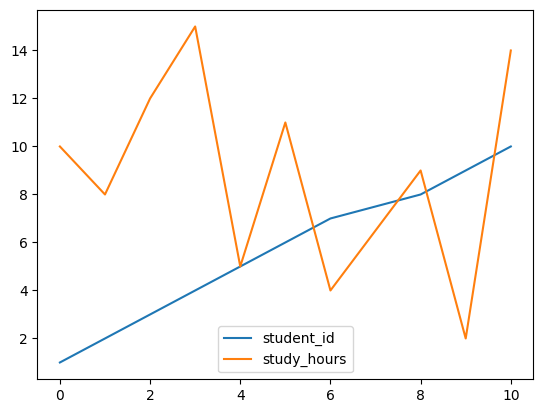

In [125]:
df.plot()

In [10]:
import pandas as pd 
dff=pd.read_csv("ecommerce_sales_data.csv")
dff

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15/03/2024,3:08:25
...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,Male,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,Female,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,Male,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,Female,01/06/2024,3:09:28


In [11]:
dff.head()

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,766.85,4,3067.40,81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25/05/2024,6:28:14
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,331.42,4,1325.68,f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04/05/2024,19:37:36
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,708.10,10,7081.00,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,774.09,2,1548.18,578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23/05/2024,22:31:43
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,397.22,1,397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15/03/2024,3:08:25


In [12]:
dff.tail()

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,777.82,2,1555.64,a38aebb9-d3b4-468b-a999-e6d26d62635f,32,Male,01/05/2024,4:49:40
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,473.23,1,473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,Female,21/05/2024,9:13:18
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,591.40,8,4731.20,190b3b11-217d-43ed-b6d2-aa55be036c85,41,Male,25/03/2024,13:34:07
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,490.93,1,490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,Female,01/06/2024,3:09:28
99999,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,938.06,8,7504.48,a060dacf-962a-464c-a5c5-a5de55014e3b,46,Male,30/05/2024,20:12:20


In [13]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Order ID         100000 non-null  object 
 1   Product Name     100000 non-null  object 
 2   Category         100000 non-null  object 
 3   Price            100000 non-null  float64
 4   Quantity         100000 non-null  int64  
 5   Total Sales      100000 non-null  float64
 6   Customer ID      100000 non-null  object 
 7   Customer Age     100000 non-null  int64  
 8   Customer Gender  100000 non-null  object 
 9   Purchase Date    100000 non-null  object 
 10  Purchase Time    100000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


In [14]:
dff["Customer Gender"].value_counts()

Customer Gender
Female    50090
Male      49910
Name: count, dtype: int64

In [15]:
# df.iloc[0]: Select the first row by position

print(dff.iloc[0])

Order ID           261e3740-c0e9-42b1-bf87-881ac950fa3a
Product Name                                   audience
Category                                  Home & Garden
Price                                            766.85
Quantity                                              4
Total Sales                                      3067.4
Customer ID        81af1248-afff-46ee-a091-81cf33d0d957
Customer Age                                         39
Customer Gender                                    Male
Purchase Date                                25/05/2024
Purchase Time                                   6:28:14
Name: 0, dtype: object


In [16]:
print(dff.iloc[0:11])

                                Order ID Product Name       Category   Price  \
0   261e3740-c0e9-42b1-bf87-881ac950fa3a     audience  Home & Garden  766.85   
1   0b332b34-46dc-4eaf-a808-fec7e97ffbc6         such       Clothing  331.42   
2   432e0b36-724d-4521-85ae-f66db8af8105         read       Clothing  708.10   
3   ca20fb08-5c65-43b8-9577-3fa49913f93b        skill    Electronics  774.09   
4   1dce189c-8c60-455f-a6f2-69bb2cb71539         cold    Electronics  397.22   
5   ebb310bc-aeba-4c74-a6ad-38823e86d950          hit  Home & Garden  857.68   
6   96f73850-6cee-4045-81a8-c86ebe2199f9         base          Books  816.40   
7   08ba4d6f-56ee-4997-9c54-e61ab0338db0       inside       Clothing  328.49   
8   dd18a780-8331-4337-8f4a-80f37cd75adc         film       Clothing  661.57   
9   16de07e0-1064-4f20-9696-78289d898571         ever           Toys  902.55   
10  9ef22c26-2a0b-4899-8bad-c1b2096911cc         goal       Clothing  397.64   

    Quantity  Total Sales              

In [17]:
print(dff.iloc[0:11,1])

0     audience
1         such
2         read
3        skill
4         cold
5          hit
6         base
7       inside
8         film
9         ever
10        goal
Name: Product Name, dtype: object


In [18]:
subset=dff.loc[0:5,["Order ID","Category"]]
display(subset)

,Order ID,Category
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,Home & Garden
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,Clothing
2,432e0b36-724d-4521-85ae-f66db8af8105,Clothing
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,Electronics
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,Electronics
5,ebb310bc-aeba-4c74-a6ad-38823e86d950,Home & Garden


In [19]:
#price of 15th index
price_15=dff.loc[15,["Price"]]
display(price_15)

Price    435.59
Name: 15, dtype: object

In [20]:
mask=dff['Price']>995
dff[mask].head(20)

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
168,e775f77e-ed44-4bd9-a3cc-f0a4328b7858,force,Home & Garden,998.04,4,3992.16,8c81d264-dae2-49a9-85ad-f3638a1d01f3,58,Male,24/05/2024,11:57:23
500,0b7aa261-b80d-467c-81fc-15f25f819231,thing,Clothing,999.99,3,2999.97,b0422d32-8e98-46d9-bd8f-950d09bc0860,67,Male,04/06/2024,7:51:58
768,814b31af-4a68-4a70-ab02-59d774b71b00,imagine,Toys,996.50,1,996.50,b796d293-e18a-4e36-a0d3-4e24b75f1f86,61,Female,31/01/2024,13:05:12
913,fa533e7e-be71-46af-95c9-e0cacd6d3149,program,Electronics,997.38,1,997.38,4fce7b22-e13d-44cc-bff9-7205f33fb891,70,Male,25/05/2024,16:43:21
990,507cbcc5-9d58-4635-9772-9eb094fe0331,through,Books,995.04,7,6965.28,2e91f529-74ae-4eea-8548-911509b3d85c,54,Male,31/05/2024,13:11:06
1429,91f8932b-703d-4145-9bbb-83c7d1462d75,bar,Clothing,997.38,2,1994.76,88bc2efe-14dc-444f-bca5-bb735f79a218,48,Female,09/03/2024,5:48:13
1570,e8c0d2c6-5c76-4b59-b5ba-1519be6bebc5,friend,Books,999.71,9,8997.39,ef75f800-08ea-43f8-a93e-9a06cf78d9ea,41,Female,01/06/2024,3:51:13
1747,65f4de14-be94-4b0b-a8d4-373d763fc1dc,dog,Home & Garden,997.67,9,8979.03,ede38a28-2ca8-4dc2-b5c9-19c8a6f50b44,52,Male,09/03/2024,21:11:05
2364,72ca0c35-f942-49d3-b4f5-fb1c33496fb3,mission,Clothing,996.90,7,6978.30,0265de0a-5b6d-41a7-b5eb-94ae526b3a6f,39,Female,10/03/2024,14:34:08
2617,ed08b0a0-0dbb-4039-b6f8-8d26e0bb47cd,well,Toys,997.37,9,8976.33,047815f9-c2c9-4b52-a3c7-2b5b69496c81,59,Male,15/03/2024,8:25:04


In [21]:
# df.loc[...]: Select specific columns
subset = dff.loc[0:5, ['Order ID', 'Category', 'Price', 'Customer Gender']]
display(subset)

,Order ID,Category,Price,Customer Gender
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,Home & Garden,766.85,Male
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,Clothing,331.42,Male
2,432e0b36-724d-4521-85ae-f66db8af8105,Clothing,708.10,Female
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,Electronics,774.09,Female
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,Electronics,397.22,Female
5,ebb310bc-aeba-4c74-a6ad-38823e86d950,Home & Garden,857.68,Female


## 2. Transformation (Sorting & Filtering)
**Concepts:** `sort_values`, `query`, boolean masking.

In [22]:
sorted_dff = dff.sort_values(by=['Purchase Date', 'Total Sales'], ascending=[False, False])
display(sorted_dff[['Purchase Date','Total Sales','Product Name']].head(20))

,Purchase Date,Total Sales,Product Name
35209,31/05/2024,9929.70,same
23311,31/05/2024,9902.50,dark
57927,31/05/2024,9877.30,up
58766,31/05/2024,9524.00,half
79331,31/05/2024,9338.40,PM
63958,31/05/2024,9255.30,until
64983,31/05/2024,9186.30,central
51260,31/05/2024,9147.40,though
85430,31/05/2024,9146.80,authority
33575,31/05/2024,9049.00,least


In [23]:
sorted_dff = dff.sort_values(by=['Category', 'Price'], ascending=[False, False])
display(sorted_dff[['Category','Price','Product Name']].head(20))

,Category,Price,Product Name
39649,Toys,999.94,set
87412,Toys,999.92,know
28715,Toys,999.91,market
18463,Toys,999.90,year
66118,Toys,999.85,food
83987,Toys,999.85,research
28859,Toys,999.82,side
18760,Toys,999.74,marriage
80692,Toys,999.69,black
27964,Toys,999.65,modern


In [24]:
dff['Price'].max()

np.float64(999.99)

In [25]:
# Task: Filter orders where Price > 990 AND Category is 'Electronics'

# Method 1: Boolean Masking
mask = (dff['Price'] > 990) & (dff['Category'] == 'Electronics')
print(f"High Value of Electronics Orders (Mask): {len(dff[mask])}")
dff[mask]

High Value of Electronics Orders (Mask): 222


,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time
333,5d474461-c5bc-4594-9f0d-6b51f9243707,yes,Electronics,994.65,6,5967.90,89754610-6f93-473c-bb02-264cdbfb08a5,38,Female,27/04/2024,2:23:27
913,fa533e7e-be71-46af-95c9-e0cacd6d3149,program,Electronics,997.38,1,997.38,4fce7b22-e13d-44cc-bff9-7205f33fb891,70,Male,25/05/2024,16:43:21
1826,ffa97bf4-4b10-44fd-b7cb-99829f714a98,magazine,Electronics,990.84,6,5945.04,8fd6bf5d-54fa-4c07-8c17-870b2c6a6ece,46,Male,09/04/2024,9:52:20
2514,a7e6763b-00ff-4f09-82b3-e3ee7ae40322,interview,Electronics,993.28,5,4966.40,4733fab2-961b-4cf4-898e-f8cc8087c5ad,52,Female,02/05/2024,20:48:49
2708,c88eb8e4-bb0c-4788-9462-fe159b8bdaeb,land,Electronics,991.01,8,7928.08,851229f3-97ad-4391-a0c5-5c58a3cba0d8,69,Female,27/04/2024,8:18:12
...,...,...,...,...,...,...,...,...,...,...,...
98876,64c1fe9b-631a-447e-a989-e9df3c3fb05d,whom,Electronics,997.25,4,3989.00,e9eb0c98-fbb7-4e65-846b-32ae53381fea,22,Female,27/02/2024,16:52:27
99177,0ead484f-bae7-4e3a-9025-a6f308c8fe8a,statement,Electronics,994.15,4,3976.60,a93446f1-6896-4226-a5c9-d606c4a76401,60,Male,13/04/2024,6:34:45
99839,14223457-5447-4d97-a90c-162f77c1931a,local,Electronics,991.99,10,9919.90,e40c0e24-d6b8-48a0-a899-fa3700d0c48b,27,Male,24/03/2024,7:29:57
99897,6274d8fd-5181-4bdc-b06b-d878650fe596,officer,Electronics,992.34,6,5954.04,034d09c3-875c-4d7b-9052-c85a21ea31e6,54,Female,07/05/2024,7:14:57


In [26]:
mask = (dff['Customer Gender'] == 'Female') & (dff['Total Sales'] > 2000)
print(f"Count (Mask): {len(dff[mask])}")

Count (Mask): 28353


In [27]:
# Method 2: Query Syntax (Cleaner)
# Syntax: df.query('col > value')

filtered_query = dff.query("Price > 990 and Category == 'Electronics'")
print(f"High Value Electronics Orders (Query): {len(filtered_query)}")

display(filtered_query[['Order ID', 'Price']].head(3))

High Value Electronics Orders (Query): 222


,Order ID,Price
333,5d474461-c5bc-4594-9f0d-6b51f9243707,994.65
913,fa533e7e-be71-46af-95c9-e0cacd6d3149,997.38
1826,ffa97bf4-4b10-44fd-b7cb-99829f714a98,990.84


## 3. Application Functions (`.apply`)
**Concepts:** `apply`, `lambda`.

**Task:** Create a column `Order_Size`.
*   If Qty == 1 -> 'Single'
*   If Qty > 1 -> 'Bulk'

In [28]:
def classify_age(age):
    if age < 30:
        return 'Young Adult'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Senior'

# Apply to 'Customer Age' column
dff['Age Group'] = dff['Customer Age'].apply(classify_age)

# Verify
print(dff['Age Group'].value_counts())
display(dff[['Customer Age', 'Age Group']].head())

Age Group
Adult          39628
Senior         37709
Young Adult    22663
Name: count, dtype: int64


,Customer Age,Age Group
0,39,Adult
1,21,Young Adult
2,27,Young Adult
3,51,Senior
4,45,Adult


In [29]:
dff['Price_with_Vat']=dff['Price'].apply(lambda x:x*1.13 )
display(dff[['Price','Price_with_Vat']].head(10))

,Price,Price_with_Vat
0,766.85,866.5405
1,331.42,374.5046
2,708.10,800.1530
3,774.09,874.7217
4,397.22,448.8586
5,857.68,969.1784
6,816.40,922.5320
7,328.49,371.1937
8,661.57,747.5741
9,902.55,1019.8815


## 4. Grouping & Aggregation
### A. Basic Grouping
**Question:** Which `Category` generates the highest Total Sales?

In [30]:
# Group by Category, Sum the Total Sales
cat_performance = dff.groupby('Category')[['Total Sales','Price']].sum().reset_index()
display(cat_performance)

,Category,Total Sales,Price
0,Books,60820086.17,11064566.47
1,Clothing,61071489.36,11130159.19
2,Electronics,59955937.12,10936573.42
3,Home & Garden,60670371.57,11009736.91
4,Toys,60274785.96,10914000.35


In [31]:
# Group by Category, Sum the Total Sales
age_group = dff.groupby('Age Group')['Total Sales'].sum().reset_index()
display(age_group)

,Age Group,Total Sales
0,Adult,1.200201e+08
1,Senior,1.147351e+08
2,Young Adult,6.803744e+07


In [32]:
# Group by Category, Sum the Total Sales
cat_performance = dff.groupby('Category')[['Total Sales']].sum().reset_index()

# Sort for better view
cat_performance = cat_performance.sort_values('Total Sales', ascending=False)

# Format as currency string for readability
pd.options.display.float_format = '${:,.2f}'.format

display(cat_performance)

,Category,Total Sales
1,Clothing,"$61,071,489.36"
0,Books,"$60,820,086.17"
3,Home & Garden,"$60,670,371.57"
4,Toys,"$60,274,785.96"
2,Electronics,"$59,955,937.12"


In [33]:
age_category=dff.groupby('Customer Age')[['Total Sales','Price','Quantity']].sum().reset_index()
display(age_category)

,Customer Age,Total Sales,Price,Quantity
0,18,"$5,776,028.88","$1,038,873.10",10398
1,19,"$5,365,066.38","$997,501.41",9867
2,20,"$5,675,119.55","$1,015,872.67",10376
3,21,"$5,919,744.73","$1,085,421.11",10796
4,22,"$5,955,318.95","$1,076,383.96",10935
5,23,"$5,650,997.32","$1,042,823.12",10402
6,24,"$5,802,135.90","$1,054,932.60",10269
7,25,"$5,431,379.04","$999,927.72",10024
8,26,"$5,387,339.79","$974,246.53",9849
9,27,"$5,864,952.46","$1,075,411.32",10596


In [34]:
age_category.describe()

,Customer Age,Total Sales,Price,Quantity
count,$53.00,$53.00,$53.00,$53.00
mean,$44.00,"$5,713,069.25","$1,038,774.27","$10,364.45"
std,$15.44,"$157,055.73","$26,537.66",$261.78
min,$18.00,"$5,356,709.12","$967,219.94","$9,663.00"
25%,$31.00,"$5,612,145.90","$1,023,938.57","$10,203.00"
50%,$44.00,"$5,726,011.68","$1,041,164.24","$10,357.00"
75%,$57.00,"$5,833,308.06","$1,054,932.60","$10,561.00"
max,$70.00,"$6,033,692.06","$1,085,421.11","$10,941.00"


In [35]:
age_group.describe()

,Total Sales
count,$3.00
mean,"$100,930,890.06"
std,"$28,608,870.60"
min,"$68,037,435.14"
25%,"$91,386,263.24"
50%,"$114,735,091.34"
75%,"$117,377,617.52"
max,"$120,020,143.70"


### B. Advanced Aggregation
**Task:** Analyze `Total Sales` by `Age Group`.

We want: Min, Max, Average, and Count of sales.

In [36]:
age_stats = dff.groupby('Age Group').agg({
    'Total Sales': ['min', 'max', 'mean', 'count']
})

display(age_stats)


Total Sales                           
                    min       max      mean  count
Age Group                                         
Adult           $100.05 $9,999.40 $3,028.67  39628
Senior          $100.07 $9,998.70 $3,042.64  37709
Young Adult     $100.14 $9,996.20 $3,002.14  22663

## 3. Merging & Concatenation
### A. Creating Secondary Data (Customer Membership)
Since the main data only has `Customer ID`, we need a separate table to simulate a database join.

In [37]:
import numpy as np


In [38]:
# Get unique customers from main df
unique_customers = dff['Customer ID'].unique()

# Assign them random membership levels
membership_data = {
    'Customer ID': unique_customers,
    'Membership Level': np.random.choice(['Bronze', 'Silver', 'Gold'], size=len(unique_customers)),
    'Discount_Eligible': np.random.choice([True, False], size=len(unique_customers))
}

members_dff = pd.DataFrame(membership_data)
print("--- Membership Table ---")
display(members_dff.head())

--- Membership Table ---


,Customer ID,Membership Level,Discount_Eligible
0,81af1248-afff-46ee-a091-81cf33d0d957,Bronze,True
1,f3f3f4ac-7ad0-4362-9134-383096d16ac8,Bronze,True
2,c4fc4269-3c1d-4b6b-ad23-d437c328d63f,Gold,True
3,578e2d1a-d92a-449d-8eeb-b704110b2975,Silver,True
4,dc6ed196-0874-46bd-bbb9-c5534f619349,Silver,False


In [39]:
full_data = pd.merge(
    left=dff,
    right=members_dff,
    on='Customer ID',
    how='left'
)

# Display result
cols_to_show = ['Order ID', 'Total Sales', 'Customer ID', 'Membership Level']
display(full_data.sample(5))
display(full_data[cols_to_show].head(5))

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price_with_Vat,Membership Level,Discount_Eligible
47509,a3af6d29-c5d4-47fb-9de4-ea80a845e8bc,development,Clothing,$571.27,9,"$5,141.43",6b8a2765-1fa5-4694-9ebb-08f729a2bb8e,49,Male,01/01/2024,8:27:53,Adult,$645.54,Silver,False
20355,a4877326-67a1-462e-a862-34e7d2bc188c,sound,Books,$133.94,3,$401.82,033b5a98-f677-4235-8b13-a42d8324806e,18,Female,18/05/2024,4:50:34,Young Adult,$151.35,Silver,True
62949,78d2fd6d-7078-4a79-888f-979206325cf6,company,Books,$327.30,1,$327.30,8833835e-2aaa-43b1-a62c-508fdb3d0eaf,50,Male,13/02/2024,22:51:12,Adult,$369.85,Gold,True
45013,b80a2931-5f1b-4ec9-976a-b368738c20ef,store,Home & Garden,$159.79,3,$479.37,d8edc216-6cc9-4e43-b0e9-e189dfd31f6d,60,Male,18/03/2024,12:16:28,Senior,$180.56,Bronze,True
59991,f3450869-3281-43c2-aaf7-5babcd0d422d,produce,Books,$171.46,10,"$1,714.60",0b48b3d5-feeb-4394-8ce4-9a301a727772,47,Female,18/01/2024,3:11:55,Adult,$193.75,Gold,True


,Order ID,Total Sales,Customer ID,Membership Level
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,"$3,067.40",81af1248-afff-46ee-a091-81cf33d0d957,Bronze
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,"$1,325.68",f3f3f4ac-7ad0-4362-9134-383096d16ac8,Bronze
2,432e0b36-724d-4521-85ae-f66db8af8105,"$7,081.00",c4fc4269-3c1d-4b6b-ad23-d437c328d63f,Gold
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,"$1,548.18",578e2d1a-d92a-449d-8eeb-b704110b2975,Silver
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,$397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,Silver


In [40]:
full_data.to_csv("full_data.csv",index=False)

In [41]:
#inner join 

df (Left Table)          members_df (Right Table)
┌──────────────┐         ┌──────────────┐
│ Customer ID  │         │ Customer ID  │
│──────┬───────│         │──────┬───────│
│ 101  │ Alice │         │ 101  │ Gold  │
│ 102  │ Bob   │         │ 103  │ Silver│
│ 103  │Charlie│         │ 104  │ Bronze│
└──────────────┘         └──────────────┘
Result (INNER JOIN):
┌──────────────┬──────────┐
│ Customer ID  │ Membership│
│──────┬───────┼──────────│
│ 101  │ Alice │   Gold   │ ← Only 101 appears in both
│ 103  │Charlie│  Silver  │ ← Only 103 appears in both
└──────────────┴──────────┘

SyntaxError: invalid character '┌' (U+250C) (2569575945.py, line 4)

In [42]:
Result (LEFT JOIN):
┌──────────────┬──────────┐
│ Customer ID  │ Membership│
│──────┬───────┼──────────│
│ 101  │ Alice │   Gold   │
│ 102  │ Bob   │   NaN    │ ← Bob kept (from left), no match
│ 103  │Charlie│  Silver  │
└──────────────┴──────────┘




SyntaxError: invalid character '┌' (U+250C) (2785438108.py, line 2)

In [43]:
Result (RIGHT JOIN):
┌──────────────┬──────────┐
│ Customer ID  │ Membership│
│──────┬───────┼──────────│
│ 101  │ Alice │   Gold   │
│ 103  │Charlie│  Silver  │
│ 104  │   NaN │  Bronze  │ ← 104 kept (from right), no match
└──────────────┴──────────┘


SyntaxError: invalid character '┌' (U+250C) (534849526.py, line 2)

In [44]:
Result (FULL OUTER JOIN):
┌──────────────┬──────────┐
│ Customer ID  │ Membership│
│──────┬───────┼──────────│
│ 101  │ Alice │   Gold   │
│ 102  │ Bob   │   NaN    │ ← From left only
│ 103  │Charlie│  Silver  │
│ 104  │   NaN │  Bronze  │ ← From right only
└──────────────┴──────────┘

SyntaxError: invalid character '┌' (U+250C) (370949198.py, line 2)

In [45]:
Result (CROSS JOIN):
┌──────────────┬──────────┐
│ Customer ID  │ Membership│
│──────┬───────┼──────────│
│ 101  │ Alice │   Gold   │
│ 101  │ Alice │  Silver  │
│ 101  │ Alice │  Bronze  │
│ 102  │ Bob   │   Gold   │
│ 102  │ Bob   │  Silver  │
│ 102  │ Bob   │  Bronze  │
│ 103  │Charlie│   Gold   │
│ 103  │Charlie│  Silver  │
│ 103  │Charlie│  Bronze  │
└──────────────┴──────────┘


SyntaxError: invalid character '┌' (U+250C) (29429690.py, line 2)

In [46]:
# Create dummy new orders
new_orders_dict = {
    'Order ID': [5001, 5002],
    'Product Name': ['Smart Watch', 'Tablet'],
    'Category': ['Electronics', 'Electronics'],
    'Total Sales': [250.00, 600.00],
    'Purchase Date': ['2024-05-01', '2024-05-01']
}
new_orders_df = pd.DataFrame(new_orders_dict)

In [56]:
updated_df = pd.concat([full_data, new_orders_df], ignore_index=True, sort=False)
updated_df

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price_with_Vat,Membership Level,Discount_Eligible
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,$766.85,$4.00,"$3,067.40",81af1248-afff-46ee-a091-81cf33d0d957,$39.00,Male,25/05/2024,6:28:14,Adult,$866.54,Bronze,True
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,$331.42,$4.00,"$1,325.68",f3f3f4ac-7ad0-4362-9134-383096d16ac8,$21.00,Male,04/05/2024,19:37:36,Young Adult,$374.50,Bronze,True
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,$10.00,"$7,081.00",c4fc4269-3c1d-4b6b-ad23-d437c328d63f,$27.00,Female,07/05/2024,17:54:42,Young Adult,$800.15,Gold,True
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,$774.09,$2.00,"$1,548.18",578e2d1a-d92a-449d-8eeb-b704110b2975,$51.00,Female,23/05/2024,22:31:43,Senior,$874.72,Silver,True
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,$397.22,$1.00,$397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,$45.00,Female,15/03/2024,3:08:25,Adult,$448.86,Silver,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,$591.40,$8.00,"$4,731.20",190b3b11-217d-43ed-b6d2-aa55be036c85,$41.00,Male,25/03/2024,13:34:07,Adult,$668.28,Bronze,True
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,$1.00,$490.93,60e350b2-601a-401c-a8f7-f45e827a6594,$56.00,Female,01/06/2024,3:09:28,Senior,$554.75,Gold,False
99999,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,$938.06,$8.00,"$7,504.48",a060dacf-962a-464c-a5c5-a5de55014e3b,$46.00,Male,30/05/2024,20:12:20,Adult,"$1,060.01",Gold,False
100000,5001,Smart Watch,Electronics,NaN,NaN,$250.00,NaN,NaN,NaN,2024-05-01,NaN,NaN,NaN,NaN,NaN


In [53]:
dff.drop(columns='Price_with_Vat')

,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group
0,261e3740-c0e9-42b1-bf87-881ac950fa3a,audience,Home & Garden,$766.85,4,"$3,067.40",81af1248-afff-46ee-a091-81cf33d0d957,39,Male,25/05/2024,6:28:14,Adult
1,0b332b34-46dc-4eaf-a808-fec7e97ffbc6,such,Clothing,$331.42,4,"$1,325.68",f3f3f4ac-7ad0-4362-9134-383096d16ac8,21,Male,04/05/2024,19:37:36,Young Adult
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,10,"$7,081.00",c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42,Young Adult
3,ca20fb08-5c65-43b8-9577-3fa49913f93b,skill,Electronics,$774.09,2,"$1,548.18",578e2d1a-d92a-449d-8eeb-b704110b2975,51,Female,23/05/2024,22:31:43,Senior
4,1dce189c-8c60-455f-a6f2-69bb2cb71539,cold,Electronics,$397.22,1,$397.22,dc6ed196-0874-46bd-bbb9-c5534f619349,45,Female,15/03/2024,3:08:25,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,67e1224d-86a1-411c-a880-69c3786a15e9,lot,Toys,$777.82,2,"$1,555.64",a38aebb9-d3b4-468b-a999-e6d26d62635f,32,Male,01/05/2024,4:49:40,Adult
99996,9ad2bf4d-9453-472a-ae50-9d6d2cf8e5e4,animal,Clothing,$473.23,1,$473.23,4fa8f362-4897-4633-995d-ec5acffbb4d7,48,Female,21/05/2024,9:13:18,Adult
99997,43c58940-e1ab-4e8a-8cea-f02811904c06,simply,Electronics,$591.40,8,"$4,731.20",190b3b11-217d-43ed-b6d2-aa55be036c85,41,Male,25/03/2024,13:34:07,Adult
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,1,$490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,Female,01/06/2024,3:09:28,Senior


In [54]:
print(f"Original Row Count: {len(dff)}")
print(f"New Row Count: {len(updated_df)}")
display(updated_df.tail(3))

Original Row Count: 100000
New Row Count: 100002


,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price_with_Vat,Membership Level,Discount_Eligible
99999,192e6ac4-2d97-4055-bec9-d0175f768ec3,nothing,Home & Garden,$938.06,$8.00,"$7,504.48",a060dacf-962a-464c-a5c5-a5de55014e3b,$46.00,Male,30/05/2024,20:12:20,Adult,"$1,060.01",Gold,False
100000,5001,Smart Watch,Electronics,NaN,NaN,$250.00,NaN,NaN,NaN,2024-05-01,NaN,NaN,NaN,NaN,NaN
100001,5002,Tablet,Electronics,NaN,NaN,$600.00,NaN,NaN,NaN,2024-05-01,NaN,NaN,NaN,NaN,NaN


# Final Exercise
**Challenge:**
1. Filter `full_data` for **'Gold'** members only.
2. Group by `Category` and calculate their average `Total Sales`.

In [57]:
gold_members = full_data[full_data['Membership Level'] == 'Gold']
gold_members


,Order ID,Product Name,Category,Price,Quantity,Total Sales,Customer ID,Customer Age,Customer Gender,Purchase Date,Purchase Time,Age Group,Price_with_Vat,Membership Level,Discount_Eligible
2,432e0b36-724d-4521-85ae-f66db8af8105,read,Clothing,$708.10,10,"$7,081.00",c4fc4269-3c1d-4b6b-ad23-d437c328d63f,27,Female,07/05/2024,17:54:42,Young Adult,$800.15,Gold,True
6,96f73850-6cee-4045-81a8-c86ebe2199f9,base,Books,$816.40,9,"$7,347.60",30220fbf-9c51-4123-bb9d-d0cd09d3c235,58,Female,02/04/2024,6:44:10,Senior,$922.53,Gold,True
10,9ef22c26-2a0b-4899-8bad-c1b2096911cc,goal,Clothing,$397.64,8,"$3,181.12",795ac3e2-c560-404d-b29a-0546321a47d4,59,Male,29/01/2024,1:55:12,Senior,$449.33,Gold,True
12,8058a0ab-d0bc-47ab-8774-3dc40745d39a,election,Electronics,$391.98,1,$391.98,b1e47361-346c-48f8-a4dd-67036fbf5320,49,Male,07/05/2024,4:31:56,Adult,$442.94,Gold,False
13,12908694-0cac-45da-967b-bd37a2f7ba4e,hit,Clothing,$668.82,8,"$5,350.56",70337cc7-6caa-4aac-be3d-a597e1a4c1d6,27,Male,15/01/2024,16:38:28,Young Adult,$755.77,Gold,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,0a78c542-d79a-4c20-afce-f9382417a1fa,hit,Toys,$379.63,1,$379.63,0a8f7dba-adfe-48fc-a1a9-de8efa1dfaae,63,Male,27/04/2024,1:52:58,Senior,$428.98,Gold,True
99988,6a352815-2b83-4974-8210-5ef1659a5008,score,Books,$157.01,1,$157.01,0b4725fe-fa57-42f8-b905-18aa19ccc9a4,29,Male,14/03/2024,4:12:38,Young Adult,$177.42,Gold,False
99991,e3b4566b-a546-468e-83fc-335e3c90172f,detail,Books,$220.56,9,"$1,985.04",73a53c10-69e7-4034-90a5-70ead175bbf9,31,Female,18/03/2024,0:00:24,Adult,$249.23,Gold,True
99998,97b93cc6-93e1-487b-94d3-8b02e6f74038,lose,Clothing,$490.93,1,$490.93,60e350b2-601a-401c-a8f7-f45e827a6594,56,Female,01/06/2024,3:09:28,Senior,$554.75,Gold,False


In [58]:
avg_sales_by_category = (
    full_data
    .groupby('Category')['Total Sales']
    .mean()
    .reset_index()
)

print(avg_sales_by_category)


        Category  Total Sales
0          Books    $3,036.90
1       Clothing    $3,031.75
2    Electronics    $3,013.01
3  Home & Garden    $3,022.34
4           Toys    $3,035.60


In [61]:
import pandas as pd 
data=pd.read_csv("country_wise_latest.csv")
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,$3.50,$69.49,$5.04,35526,737,$2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,$2.95,$56.25,$5.25,4171,709,$17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,$4.16,$67.34,$6.17,23691,4282,$18.07,Africa
3,Andorra,907,52,803,52,10,0,0,$5.73,$88.53,$6.48,884,23,$2.60,Europe
4,Angola,950,41,242,667,18,1,0,$4.32,$25.47,$16.94,749,201,$26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,$0.73,$35.33,$2.08,8916,1705,$19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,$10.00,$80.00,$12.50,10,0,$0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,$28.56,$49.26,$57.98,1619,72,$4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,$3.08,$61.84,$4.97,3326,1226,$36.86,Africa
